# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
api_key = '94a0e22101be54179616d71a41fff66e'
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send an HTTP GET request to the OpenWeatherMap API with the city name and API key
        response = requests.get(city_url)
          
        # If the request was successful (status code 200), parse the JSON data
        if response.status_code == 200:
            city_weather = json.loads(response.content)
        else:
            # If the request was unsuccessful, print an error message
            print("Error: Failed to retrieve weather data for %s" % city)
            city_weather = None 
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | camacupa
Processing Record 3 of Set 1 | gataia
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | obihiro
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | kerikeri
Processing Record 9 of Set 1 | malyn
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | palikir - national government center
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | dzhalagash
Processing Record 14 of Set 1 | dudinka
Processing Record 15 of Set 1 | ubari
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | bol
Processing Record 19 of Set 1 | guarapari
Processing Record 20 of Set 1 | tuy hoa
Processing Record 21 of Set 1 | constantia
Processing Record 22 of Set 1 | summerside
Pro

Processing Record 23 of Set 4 | port mathurin
Processing Record 24 of Set 4 | petropavlovsk-kamchatsky
Processing Record 25 of Set 4 | oppdal
Processing Record 26 of Set 4 | santa ana de yacuma
Processing Record 27 of Set 4 | udachny
Processing Record 28 of Set 4 | awjilah
Processing Record 29 of Set 4 | st. john's
Processing Record 30 of Set 4 | la gi
Processing Record 31 of Set 4 | erbaa
Processing Record 32 of Set 4 | karamay
Error: Failed to retrieve weather data for karamay
City not found. Skipping...
Processing Record 33 of Set 4 | shihezi
Processing Record 34 of Set 4 | kerema
Processing Record 35 of Set 4 | kalabo
Processing Record 36 of Set 4 | shunyi
Processing Record 37 of Set 4 | bernalillo
Processing Record 38 of Set 4 | mahdia
Processing Record 39 of Set 4 | shingu
Processing Record 40 of Set 4 | slawkow
Processing Record 41 of Set 4 | kedougou
Processing Record 42 of Set 4 | santo antonio
Processing Record 43 of Set 4 | kapuskasing
Processing Record 44 of Set 4 | iluliss

Processing Record 49 of Set 7 | stjordalshalsen
Processing Record 0 of Set 8 | luwuk
Processing Record 1 of Set 8 | medina
Processing Record 2 of Set 8 | itoman
Processing Record 3 of Set 8 | aranyaprathet
Processing Record 4 of Set 8 | manay
Processing Record 5 of Set 8 | kenai
Processing Record 6 of Set 8 | bang saphan
Processing Record 7 of Set 8 | aswan
Processing Record 8 of Set 8 | port hedland
Processing Record 9 of Set 8 | vingt cinq
Error: Failed to retrieve weather data for vingt cinq
City not found. Skipping...
Processing Record 10 of Set 8 | mancio lima
Processing Record 11 of Set 8 | tomatlan
Processing Record 12 of Set 8 | nikolayevsk-on-amure
Processing Record 13 of Set 8 | silver city
Processing Record 14 of Set 8 | whyalla stuart
Error: Failed to retrieve weather data for whyalla stuart
City not found. Skipping...
Processing Record 15 of Set 8 | port glaud
Error: Failed to retrieve weather data for port glaud
City not found. Skipping...
Processing Record 16 of Set 8 | 

Processing Record 21 of Set 11 | yoichi
Processing Record 22 of Set 11 | rio gallegos
Processing Record 23 of Set 11 | cuenca
Processing Record 24 of Set 11 | qulsary
Processing Record 25 of Set 11 | lorengau
Processing Record 26 of Set 11 | port macquarie
Processing Record 27 of Set 11 | buka
Processing Record 28 of Set 11 | 'ain el melh
Processing Record 29 of Set 11 | mount pearl
Processing Record 30 of Set 11 | marquette
Processing Record 31 of Set 11 | carbonear
Processing Record 32 of Set 11 | kigoma
Processing Record 33 of Set 11 | omuthiya
Error: Failed to retrieve weather data for omuthiya
City not found. Skipping...
Processing Record 34 of Set 11 | ciudad del carmen
Processing Record 35 of Set 11 | leer
Processing Record 36 of Set 11 | bodo
Processing Record 37 of Set 11 | cabedelo
Processing Record 38 of Set 11 | al hudaydah
Processing Record 39 of Set 11 | ciudad hidalgo
Processing Record 40 of Set 11 | zeribet el oued
Processing Record 41 of Set 11 | fort morgan
Processing

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,271.43,74,40,3.00,RU,1681943835
1,camacupa,-12.0167,17.4833,288.84,77,43,1.15,AO,1681944226
2,gataia,45.4311,21.4300,281.94,90,35,0.98,RO,1681944227
3,saldanha,-33.0117,17.9442,287.18,84,100,6.92,ZA,1681943835
4,talnakh,69.4865,88.3972,256.34,96,95,3.24,RU,1681943767


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/Khurram/Desktop/Github Assignment Repos/PYTHON-API-CHALLENGE/output_data/cities.csv", index_label="City_ID")


In [39]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/Khurram/Desktop/Github Assignment Repos/PYTHON-API-CHALLENGE/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,271.43,74,40,3.00,RU,1681943835
1,camacupa,-12.0167,17.4833,288.84,77,43,1.15,AO,1681944226
2,gataia,45.4311,21.4300,281.94,90,35,0.98,RO,1681944227
3,saldanha,-33.0117,17.9442,287.18,84,100,6.92,ZA,1681943835
4,talnakh,69.4865,88.3972,256.34,96,95,3.24,RU,1681943767


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

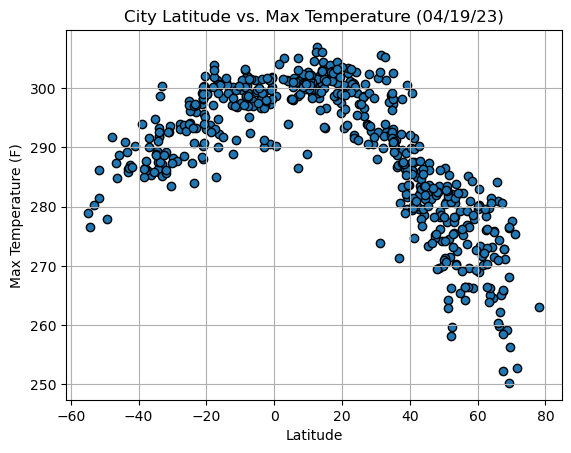

In [40]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/Khurram/Desktop/Github Assignment Repos/PYTHON-API-CHALLENGE/output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

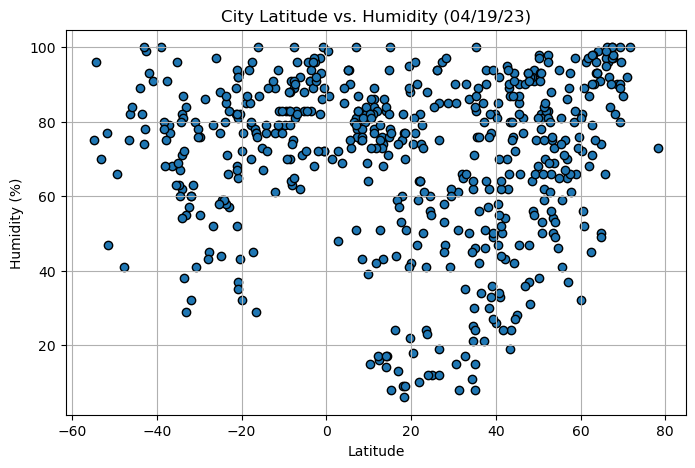

In [41]:
# Set plot size
plt.figure(figsize=(8, 5))

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("C:/Users/Khurram/Desktop/Github Assignment Repos/PYTHON-API-CHALLENGE/output_data/Fig2.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

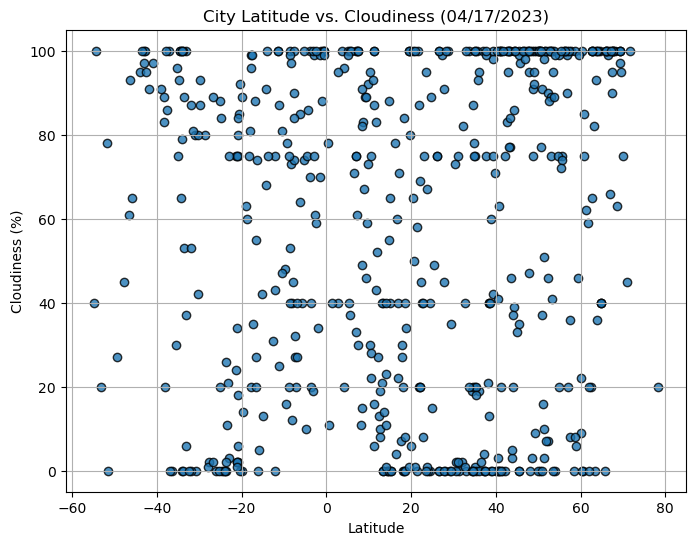

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.title("City Latitude vs. Cloudiness (04/17/2023)")

# Incorporate the other graph properties
# Set x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Set grid and save the plot
plt.grid()
plt.savefig("C:/Users/Khurram/Desktop/Github Assignment Repos/PYTHON-API-CHALLENGE/output_data/Fig3.png")

# Show the plot
plt.show()



#### Latitude vs. Wind Speed Plot

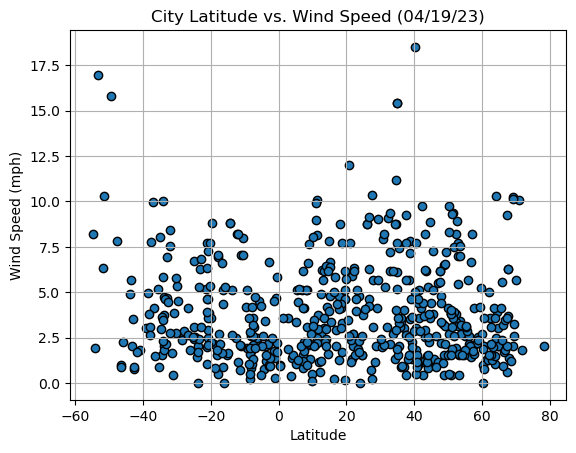

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
            marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/Khurram/Desktop/Github Assignment Repos/PYTHON-API-CHALLENGE/output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots


def plot_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Calculate regression line
    regression_line = slope * x_data + intercept
    
    # Create scatter plot
    plt.scatter(x_data, y_data)
    
    # Add regression line to plot
    plt.plot(x_data, regression_line, color='red')
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print r-value to console
    print(f"The r-value is: {r_value}")
    
    plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (F)", "City Latitude vs. Max Temperature")

    
    # Show plot
    plt.show()


In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Create a DataFrame with only the cities in the Northern Hemisphere
northern_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,271.43,74,40,3.00,RU,1681943835
2,gataia,45.4311,21.4300,281.94,90,35,0.98,RO,1681944227
4,talnakh,69.4865,88.3972,256.34,96,95,3.24,RU,1681943767
5,obihiro,42.9172,143.2044,283.40,62,95,1.14,JP,1681944227
8,malyn,50.7723,29.2383,280.72,82,100,3.87,UA,1681944228


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,camacupa,-12.0167,17.4833,288.84,77,43,1.15,AO,1681944226
3,saldanha,-33.0117,17.9442,287.18,84,100,6.92,ZA,1681943835
6,port-aux-francais,-49.3500,70.2167,277.94,66,27,15.82,TF,1681943761
7,kerikeri,-35.2268,173.9474,294.77,96,96,0.89,NZ,1681943924
9,margaret river,-33.9500,115.0667,285.77,62,0,3.73,AU,1681943766


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.77


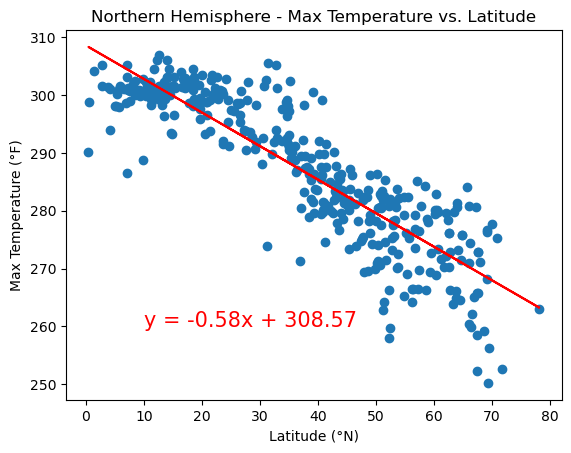

In [47]:
# Linear regression on Northern Hemisphere
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Define x and y values
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create equation of line to display on plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# Create scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude (°N)")
plt.ylabel("Max Temperature (°F)")
plt.annotate(line_eq, (10, 260), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")
plt.show()


The r-squared is: 0.58


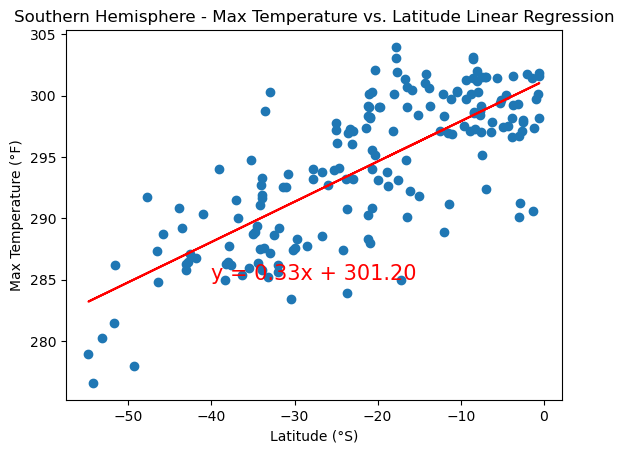

In [48]:
# Linear regression on Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Define x and y values
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create equation of line to display on plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# Add labels and title
plt.xlabel("Latitude (°S)")
plt.ylabel("Max Temperature (°F)")
plt.annotate(line_eq, (-40, 285), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.show()


**Discussion about the linear relationship:** In the Northern Hemisphere, the linear regression analysis showed a strong negative correlation between maximum temperature and latitude. This means that as the latitude increases, the maximum temperature tends to decrease significantly. This relationship is consistent with the fact that the Northern Hemisphere has a cooler climate compared to the equatorial regions.

On the other hand, in the Southern Hemisphere, the linear regression analysis showed a weaker negative correlation between maximum temperature and latitude. This suggests that as the latitude increases in the Southern Hemisphere, the maximum temperature tends to decrease, but not as significantly as in the Northern Hemisphere.

Overall, these analyses suggest that there is a negative correlation between maximum temperature and latitude in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04


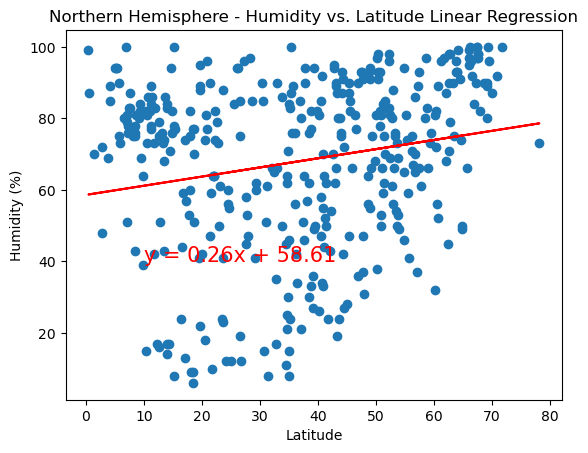

In [49]:
# Northern Hemisphere
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Build the scatter plot for latitude vs. humidity in the Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
plt.scatter(x_values, y_values)


# Perform linear regression on latitude vs. humidity in the Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line to display on the plot
line_eq = f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# Set the plot title and labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Save the plot as a PNG image
plt.savefig('Northern Hemisphere - Humidity vs. Latitude Linear Regression.png')

# Show the plot
plt.show()

The r-squared is: 0.06


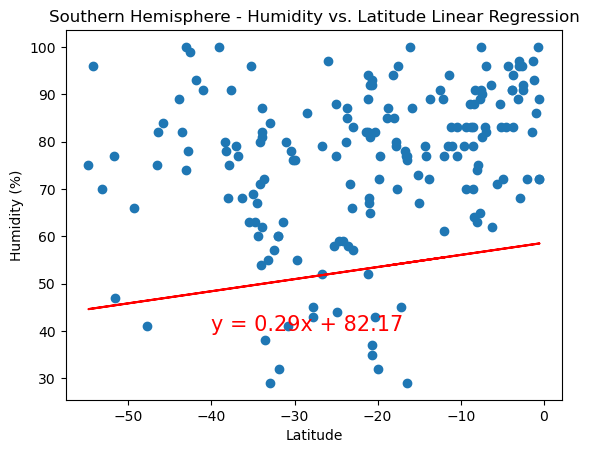

In [50]:
# Southern Hemisphere
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Create a scatter plot of latitude vs. humidity
plt.scatter(southern_df["Lat"], southern_df["Humidity"])


# Add the linear regression equation and line to plot
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
regress_values = x_values * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)


# Create equation of line to display on the plot
line_eq = f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# Add chart labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")


# Display plot
plt.show()


**Discussion about the linear relationship:** In the Northern Hemisphere, the linear regression analysis showed a weak positive correlation between humidity and latitude. This means that as the latitude increases, the humidity tends to increase slightly, but the relationship is not very strong.

On the other hand, in the Southern Hemisphere, the linear regression analysis showed a weak negative correlation between humidity and latitude. This suggests that as the latitude increases in the Southern Hemisphere, the humidity tends to decrease slightly.

Overall, these analyses suggest that there is a weak relationship between humidity and latitude in both hemispheres, but the direction of the relationship varies between the two. It's important to note that humidity levels are also influenced by other factors such as temperature, precipitation, and air pressure. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21566183333075506


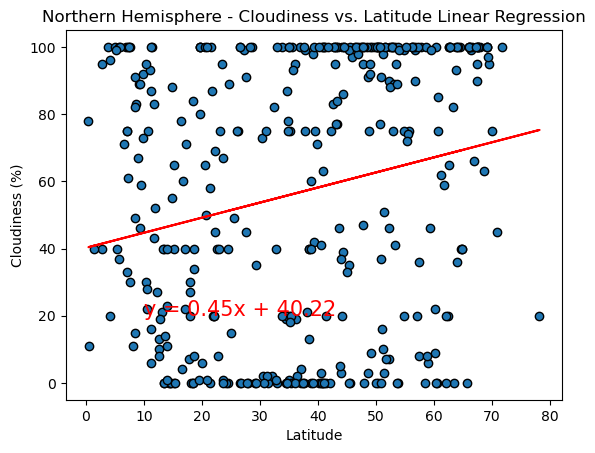

In [20]:
# Northern Hemisphere

# Create a DataFrame with only cities in the northern hemisphere
northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Create a scatter plot of cloudiness vs. latitude
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], edgecolor="black")

# Calculate the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Cloudiness"])
regress_values = northern_df["Lat"] * slope + intercept

# Create equation of line to display on the plot
line_eq = f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression line on top of the scatter plot
plt.plot(northern_df["Lat"], regress_values, color="red")

# Set the title, xlabel, and ylabel
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
# Print the r-value
print(f"The r-value is: {rvalue}")

# Show the plot
plt.show()


The r-squared is: 0.0006737720748120987


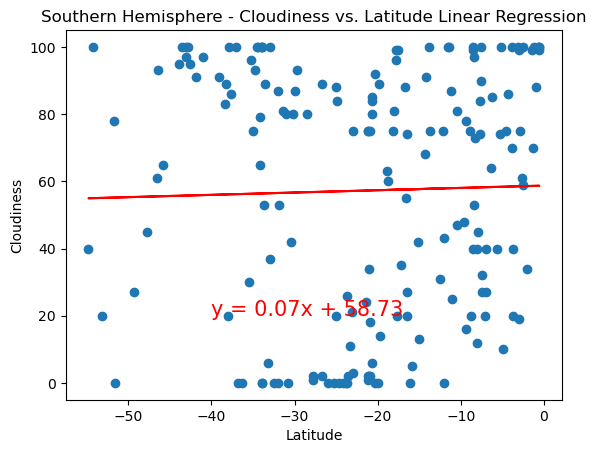

In [51]:
# Southern Hemisphere

# Create a DataFrame with Southern Hemisphere data only
southern_hemisphere_data = city_data_df.loc[city_data_df["Lat"] < 0]

# Define x and y values
x_values = southern_hemisphere_data["Lat"]
y_values = southern_hemisphere_data["Cloudiness"]


# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

# Create equation of line to display on the plot
line_eq = f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** In the Northern Hemisphere, the linear regression analysis showed a weak positive correlation between cloudiness and latitude. This means that as the latitude increases, the cloudiness tends to increase slightly, but the relationship is not very strong.

On the other hand, in the Southern Hemisphere, the linear regression analysis showed a weak negative correlation between cloudiness and latitude. This suggests that as the latitude increases in the Southern Hemisphere, the cloudiness tends to decrease slightly.

Overall, these analyses suggest that there is a weak relationship between cloudiness and latitude in both hemispheres, but the direction of the relationship varies between the two. Cloudiness is influenced by various factors such as air pressure, temperature, and wind patterns.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0010640774965165324


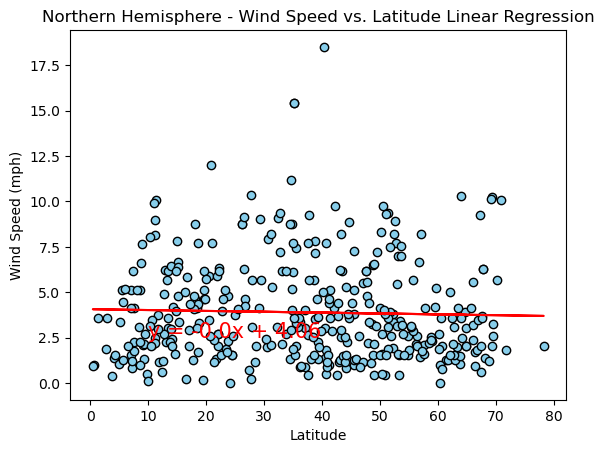

In [53]:
# Northern Hemisphere
# Filter data for the northern hemisphere only
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="black", facecolors="skyblue")


# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Calculate regression line values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create equation of line
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Add regression line to the plot
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (10, 2.5), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Show the plot
plt.show()


The r-squared is: 0.09


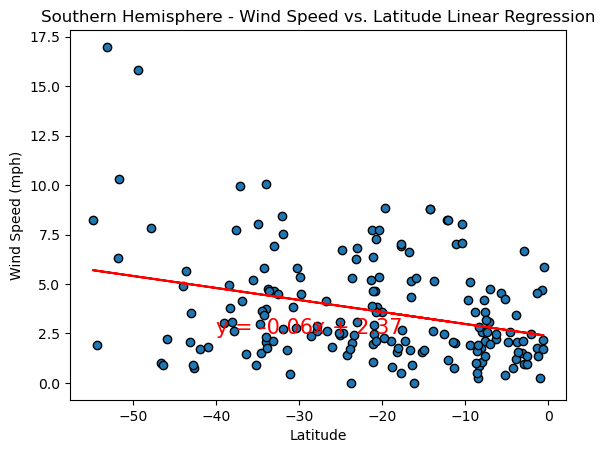

In [55]:
# Southern Hemisphere
# Create a scatter plot for latitude vs. wind speed
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], edgecolor="black")

# Perform linear regression
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# Plot the regression line on the scatter plot
plt.plot(x_values, regress_values, "r-")

# Set the title, x label, and y label of the scatter plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (-40, 2.5), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Display the scatter plot
plt.show()


**Discussion about the linear relationship:** In the Northern Hemisphere, the linear regression analysis showed that there is a weak negative correlation between wind speed and latitude. This means that as the latitude increases, the wind speed tends to decrease slightly. However, the correlation is weak, indicating that the relationship between the two variables is not very strong.

On the other hand, in the Southern Hemisphere, the linear regression analysis showed a slightly stronger negative correlation between wind speed and latitude. This indicates that as the latitude increases in the Southern Hemisphere, the wind speed tends to decrease at a slightly faster rate than in the Northern Hemisphere.

Overall, these analyses suggest that there is a negative correlation between wind speed and latitude in both hemispheres, but the relationship is relatively weak.